In [2]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict

In [50]:
class AgentState(TypedDict):
    message: str


def greeting_node(state: AgentState) -> AgentState:
    state["message"] += f"Hello {state["message"]},it's nice to meet you"
    return state

In [51]:
graph = StateGraph(AgentState)

In [52]:
graph.add_node("greeting", greeting_node)
graph.set_entry_point("greeting")
graph.set_finish_point("greeting")

In [53]:
app = graph.compile()

In [54]:
from IPython.display import Image, display

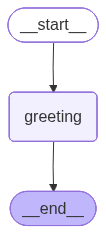

In [55]:
display(Image(app.get_graph().draw_mermaid_png()))

In [56]:
app.invoke({"message": "Bob"})

{'message': "BobHello Bob,it's nice to meet you"}

In [61]:
def greeting_node(state: AgentState) -> AgentState:
    state["message"] = f"{state["message"]},  you are doing an amazing job by learning LangGraph"
    return state

In [62]:
app.invoke({"message": "Ram Mohan"})

{'message': "Ram MohanHello Ram Mohan,it's nice to meet you"}

In [63]:
new_app = graph.compile()

* A function's node can't be changed in its functionality by creating a new function with the same name

In [ ]:
new_app.invoke({"message": "Ram Mohan"})

{'message': "Ram MohanHello Ram Mohan,it's nice to meet you"}

In [65]:
graph = StateGraph(AgentState)

In [66]:
graph.add_node("greeting", greeting_node)

In [67]:
graph.set_entry_point("greeting")
graph.set_finish_point("greeting") 

In [68]:
greeting_updated_app = graph.compile()

In [69]:
greeting_updated_app.invoke({"message": "Ram Mohan"})

{'message': 'Ram Mohan,  you are doing an amazing job by learning LangGraph'}

#### MultipleInputs

In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str 


In [4]:
def process_values(state: AgentState) -> AgentState:
    
    state["result"] = f"Hi there {state["name"]}!, Your sum = {sum(state["values"])}"
    return state

In [5]:
graph = StateGraph(AgentState)

In [6]:
graph.add_node("process", process_values)
graph.set_entry_point("process")
graph.set_finish_point("process")


In [7]:
app = graph.compile()

In [ ]:
app.invoke({"values": [1, 2, 3, 4],
            "name": "Ram Mohan"})

{'values': [1, 2, 3, 4],
 'name': 'Ram Mohan',
 'result': 'Hi there Ram Mohan!, Your sum = 10'}

In [9]:
import numpy as np

In [31]:
def add_or_mult(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        state["results"] = f"Hey {state["name"]}, your sum is {sum(state["values"])}"
    elif state["operation"] == "*":
        state["results"] = f"Hey {state["name"]}, your product is {np.prod(state["values"])}"
    else: 
        state["results"] = f"Hey {state["name"]}, you can only perform '+' or '*' operations"

    return state

In [22]:
class AgentState(TypedDict):
    name: str
    results: str
    values: List[int]
    operation: str

In [35]:
add_graph = StateGraph(AgentState)

In [36]:
from langgraph.graph import START, END

In [37]:
add_graph.add_node("operations", add_or_mult)
add_graph.add_edge(START, "operations")
add_graph.add_edge("operations", END)

In [38]:
add_mul_app = add_graph.compile()

In [47]:
nums = [i for i in range(1, 100)]

name = "Raj"

In [48]:
answer = add_mul_app.invoke({"values": nums,
             "name":name,
             "operation": "+"}) 

answer["results"]

'Hey Raj, your sum is 4950'

In [57]:
nums = [i for i in range(1, 10)]
add_mul_app.invoke({"values": nums,
                "name": name,
                "operation": "*"}) ["results"]

'Hey Raj, your product is 362880'

### Graph III

In [59]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph

In [60]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [75]:
def first_node(state: AgentState) -> AgentState:
    """ This is the first node being built in a multinode graph"""
    state["final"] = f"Hi {state["name"]}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """ second node of the constructing graph"""
    state["final"] += f" You are {state["age"]} years old!, "
    return state

def third_node(state: AgentState) -> AgentState:
    """ third node """
    state["final"] += "So you have finally completed the third trial to reach the end"
    return state

In [76]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)
graph.set_entry_point("first_node")
graph.set_finish_point('third_node')
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")

In [77]:
app = graph.compile()

In [78]:
from IPython.display import Image

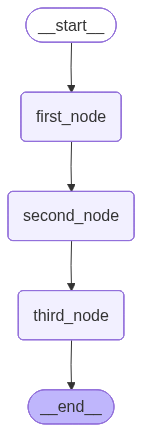

In [79]:
display(Image(app.get_graph().draw_mermaid_png()))

In [80]:
app.invoke({"name": "Rahul", "age": 24})

{'name': 'Rahul',
 'age': 24,
 'final': 'Hi Rahul! You are 24 years old!, So you have finally completed the third trial to reach the end'}

In [83]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Union

In [84]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: Union[int, float]

In [85]:
def add_node(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] + state["number2"]

    return state

def sub_node(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] - state["number2"]

    return state

def div_node(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] / state["number2"]

    return state

def mult_node(state: AgentState) -> AgentState:
    state["finalNumber"] = state["number1"] * state["number2"]

    return state

In [92]:
def condition_node(state: AgentState):
    match state["operation"]:
        case "+": 
            return "add_node"
        case "-":
            return "sub_node"
        case "*":
            return "mult_node"
        case "/":
            return "div_node"

In [ ]:
arithmetic_graph = StateGraph(AgentState)
arithmetic_graph.add_node("add", add_node)
arithmetic_graph.add_node("sub", sub_node)
arithmetic_graph.add_node("mult", mult_node)
arithmetic_graph.add_node("div", div_node)
# arithmetic_graph.add_node("router", lambda x: x)
arithmetic_graph.add_conditional_edges(source=START ,# "router"
                                       path= condition_node,
                                       path_map = {
                                           "add_node": "add",  #key, value => key_to_node the return, node_name, "Edge": "node"
                                           "sub_node": "sub",
                                           "mult_node": "mult",
                                           "div_node": "div"
                                       })
for node_name in arithmetic_graph.nodes:
    arithmetic_graph.add_edge(node_name, END)


In [96]:
arithmetic_app = arithmetic_graph.compile()

In [98]:
arithmetic_app.invoke({"number1": 2, 
                       "number2": 7, 
                       "operation": '*'})["finalNumber"]

14

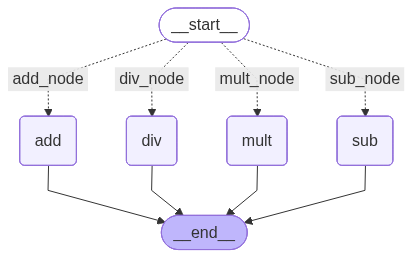

In [99]:
display(Image(arithmetic_app.get_graph().draw_mermaid_png()))

In [138]:
from typing import Annotated
import operator

In [139]:
class AgentState(TypedDict):
    step: int
    info: Annotated[str, operator.add]

In [151]:
# def take_step(state: AgentState) -> AgentState:
#     info = f"\nexecuted final step: {state["step"]}"
#     return {'info': info,
#             "step": state["step"] + 1}

def take_step(state: AgentState) -> AgentState:
    state['step'] += 1
    state['info'] = f"\nexecuted final step: {state["step"]}"
    return state
def step_check(state: AgentState):
    if state["step"] > 5 :
        return "end"
    return "take_step"

In [152]:
loop_graph = StateGraph(AgentState)

In [153]:
loop_graph.add_node("take_step", take_step)
loop_graph.add_edge(START, "take_step")
loop_graph.add_conditional_edges(source="take_step",
                                 path = step_check,
                                 path_map = {"take_step": "take_step",
                                             "end": END})

In [154]:
loop_app = loop_graph.compile()


In [155]:
print(loop_app.invoke({"step": 0})["info"])


executed final step: 1
executed final step: 2
executed final step: 3
executed final step: 4
executed final step: 5
executed final step: 6


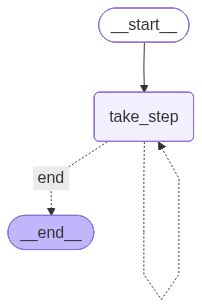

In [157]:
display(Image(loop_app.get_graph().draw_mermaid_png()))

In [156]:
import random 

In [159]:
from typing import Annotated, List, Union, TypedDict
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

from dotenv import load_dotenv
load_dotenv()

True

In [160]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]


In [161]:
llm = ChatOpenAI(model="gpt-4o")

In [162]:
def process(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print(response)
    return {"messages": response}

In [164]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()



In [165]:
agent.invoke({"messages": [SystemMessage("You are a deep learning specialist who lead many innovative projects"),
                          HumanMessage("What do you think about autoencoders replacing GAN's?")]})

content='Autoencoders and Generative Adversarial Networks (GANs) are both powerful tools in the realm of deep learning, but they serve different purposes and have distinct strengths and weaknesses. Whether autoencoders could replace GANs depends on the specific application and requirements.\n\n### Autoencoders\n**Strengths:**\n1. **Dimensionality Reduction:** Autoencoders are great for compressing data into lower-dimensional representations or embeddings.\n2. **Reconstruction:** They can effectively reconstruct input data, making them useful for denoising, anomaly detection, and other similar tasks.\n3. **Stability:** Autoencoders tend to be more stable during training compared to GANs.\n\n**Weaknesses:**\n1. **Realism and Diversity:** Autoencoders typically struggle with generating high-quality, diverse samples from the latent space that are as realistic as those generated by GANs.\n2. **Mode Collapse:** Autoencoders might not explore the latent space as effectively as GANs, leading t

{'messages': [SystemMessage(content='You are a deep learning specialist who lead many innovative projects', additional_kwargs={}, response_metadata={}, id='daf96cb2-dd34-498c-b9fa-d33d21369054'),
  HumanMessage(content="What do you think about autoencoders replacing GAN's?", additional_kwargs={}, response_metadata={}, id='9d8b70f4-b912-4d48-aa1e-cead15ce86e8'),
  AIMessage(content='Autoencoders and Generative Adversarial Networks (GANs) are both powerful tools in the realm of deep learning, but they serve different purposes and have distinct strengths and weaknesses. Whether autoencoders could replace GANs depends on the specific application and requirements.\n\n### Autoencoders\n**Strengths:**\n1. **Dimensionality Reduction:** Autoencoders are great for compressing data into lower-dimensional representations or embeddings.\n2. **Reconstruction:** They can effectively reconstruct input data, making them useful for denoising, anomaly detection, and other similar tasks.\n3. **Stability:*

#### Agent: ReAct agent

In [187]:
%%writefile ReActAgentTry.py

from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage, SystemMessage, HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START , END
from langgraph.prebuilt import ToolNode

load_dotenv()

# Reducer Function
# Rule that controls how updates from nodes are combined with the existing state
# Tells us how to merge new data into the current state

# Without a reducer, updates would  have replaced the existing value entirely

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


@tool
def add(a: int, b: int):
    """ 
        An addition function which adds the two given numbers together
    """
    return a + b

@tool
def subtract(a: int, b: int):
    """ 
        An subtraction function which calculates the difference of two given numbers together
    """
    return a - b

@tool
def multiply(a: int, b: int):
    """ 
        An multiplication function which finds the product of two given numbers
    """
    return a * b


tools = [add, subtract, multiply]

model = ChatOpenAI(model="gpt-4o").bind_tools(tools)

def model_call(state:AgentState) -> AgentState:
    system_prompt = SystemMessage(content="""You are my helpful associate, who answers my queries to 
                                  the best of your abilities and always to tries to clear and concise"""
                                  )
    response = model.invoke([system_prompt] + state["messages"])
    return {"messages":[response]}

def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    if not last_message.tool_calls:
        return "end"
    else:
        return "continue"



graph = StateGraph(AgentState)
graph.add_node("our_agent", model_call)

tool_node = ToolNode(tools=tools)
graph.add_node("tools", tool_node)
graph.add_edge("tools", "our_agent")
graph.add_edge(START, "our_agent")
graph.add_conditional_edges("our_agent",
                            should_continue,
                            {"continue": "tools",
                             "end": END})


app = graph.compile()


def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

inputs = {"messages": [("user", "Add 3 + 4 and then multiply the results by 10")]}
print_stream(app.stream(inputs, stream_mode="values"))

Writing ReActAgentTry.py


### Document Drafter

In [1]:
%%writefile Drafter.py
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage, AIMessage, ToolMessage
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from langgraph.graph import START, END, StateGraph
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode

load_dotenv()

document_content = ""

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

@tool 
def update(content: str) -> str:
    """
    Updates the document content stored in the document_content global variable with the given content
        
    """
    global document_content
    document_content = content
    return f"Document has been updated sucessfully! The current content is:\n{document_content}"

@tool 
def save(filename: str) :
    """ saves the current content in the global document_content variable at 
      the  path specified with file varaible"""
    
    global document_content

    if not filename.endswith('.txt'):
        filename = f"{filename}.txt"

    try : 
        with open(filename, 'w') as file:
            file.write(document_content)
        print(f"\n Document has been saved to: {filename}")
        return f"Document has been saved successfully to {filename}."
    except Exception as e:
        return f"Error saving document: {str(e)}"
    


tools = [update, save]

model = ChatOpenAI(model="gpt-4o").bind_tools(tools)

def our_agent(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(
        content=f"""
    You are Drafter, a helpful writing assistant. You are going to help the user update and modify documents.
                                    
    - If the user wants to update or modify content, use the 'update' tool with the completed update content.
    - If the user wants to save and finish,  you need to use the 'save' tool.
    - Make sure to always show the current document state after modifications.

    The current document content is: {document_content}
    """)

    if not state["messages"]:
        user_input = "I'm ready to help you update a document. What would you like to create?"
        user_message = HumanMessage(content=user_input)
    else:
        user_input = input("\nWhat would you like to do with the document? ")
        print(f"\n USER: {user_input}")
        user_message = HumanMessage(content=user_input)

    all_messages = [system_prompt] + list(state["messages"]) + [user_message]

    response = model.invoke(all_messages)

    print(f"\n🤖 AI {response.content}")
    if hasattr(response, "tool_calls") and response.tool_calls:
        print(f"USING TOOLS: {[tc["name"] for tc in response.too_calls]}")

    return {"messages": list(state["messages"] + [user_message, response])}

def should_continue(state: AgentState) -> str:
    """Determine wether we should continue or end the conversation"""
    messages = state["messages"]

    if not messages:
        return "continue"
    
    # This looks for the most recent tool message....
    for message in reversed(messages):
        if (isinstance(message, ToolMessage) and 
            "saved" in message.content.lower() and
            "document" in message.content.lower()):
            return "end"
        
    return "continue"



graph = StateGraph(AgentState)

graph.add_node("agent", our_agent)
graph.add_node("tools", ToolNode(tools))

graph.set_entry_point("agent")

graph.add_edge("agent", "tools")

graph.add_conditional_edges(
    "tools",
    should_continue,
    {"continue": "agent",
    "end": END}
)


app = graph.compile()

Writing Drafter.py


In [2]:
def print_messages(messages):
    """Function I made to print the messages in a more readable format"""
    if not messages:
        return
    
    for message in messages[-3:]:
        if isinstance(message, ToolMessage):
            print(f"\n🛠️ TOOL RESULT: {message.content}")


In [ ]:
state = {"messages": []}

for step in app.stream(state, stream_mode="values"):
    if "messages" in step:
        print_messages(step["messages"])


🤖 AI We currently have an empty document. Please let me know what you would like to include or update in the document.
